In [4]:
library(tidyverse)
library(tidymodels)

In [19]:
marathon <- read_csv("data/marathon.csv") |>
  mutate(
      female = as_factor(female),
      footwear = as_factor(footwear),
      group = as_factor(group),
      injury = as_factor(injury),
      mf_di = as_factor(mf_di),
      sprint = as_factor(sprint)
  )

marathon |> head()

Rows: 929 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (13): age, bmi, female, footwear, group, injury, mf_d, mf_di, mf_ti, max...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,bmi,female,footwear,group,injury,mf_d,mf_di,mf_ti,max,sprint,mf_s,time_hrs
<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
35,23.59232,0,2,1,2,42195,4,10295,60,1,4.098592,2.859722
33,22.51830,0,2,2,2,42195,3,12292,50,0,3.432720,3.414444
38,25.56031,0,2,3,1,42195,4,10980,65,0,3.842896,3.050000
34,22.60793,0,2,1,1,42195,3,10694,88,1,3.945670,2.970556
39,24.97484,0,2,1,1,42195,2,13452,51,0,3.136708,3.736667
33,24.30183,1,2,2,1,42195,3,14940,40,0,2.824297,4.150000


In [21]:
# use knn to fit the model on everything
k5 <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
    set_engine("kknn") |>
    set_mode("classification")
k5

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 5
  weight_func = rectangular

Computational engine: kknn 


In [24]:
r_marathon <- recipe(female ~ max, data = marathon)
r_marathon



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 1



In [25]:
f_knn <- workflow() |>
    add_recipe(r_marathon) |>
    add_model(k5) |>
    fit(data = marathon)
f_knn

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(5,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.4036598
Best kernel: rectangular
Best k: 5

In [28]:
predict(object = f_knn, new_data = marathon) |> head()

.pred_class
<fct>
0
1
0
0
0
0


In [29]:
marathon |> head()

age,bmi,female,footwear,group,injury,mf_d,mf_di,mf_ti,max,sprint,mf_s,time_hrs
<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
35,23.59232,0,2,1,2,42195,4,10295,60,1,4.098592,2.859722
33,22.51830,0,2,2,2,42195,3,12292,50,0,3.432720,3.414444
38,25.56031,0,2,3,1,42195,4,10980,65,0,3.842896,3.050000
34,22.60793,0,2,1,1,42195,3,10694,88,1,3.945670,2.970556
39,24.97484,0,2,1,1,42195,2,13452,51,0,3.136708,3.736667
33,24.30183,1,2,2,1,42195,3,14940,40,0,2.824297,4.150000


In [31]:
bind_cols(marathon, predict(object = f_knn, new_data = marathon)) |> head()

age,bmi,female,footwear,group,injury,mf_d,mf_di,mf_ti,max,sprint,mf_s,time_hrs,.pred_class
<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>
35,23.59232,0,2,1,2,42195,4,10295,60,1,4.098592,2.859722,0
33,22.51830,0,2,2,2,42195,3,12292,50,0,3.432720,3.414444,1
38,25.56031,0,2,3,1,42195,4,10980,65,0,3.842896,3.050000,0
34,22.60793,0,2,1,1,42195,3,10694,88,1,3.945670,2.970556,0
39,24.97484,0,2,1,1,42195,2,13452,51,0,3.136708,3.736667,0
33,24.30183,1,2,2,1,42195,3,14940,40,0,2.824297,4.150000,0


In [32]:
marathon |>
    bind_cols(predict(f_knn, marathon)) |>
    count(female, .pred_class)

female,.pred_class,n
<fct>,<fct>,<int>
0,0,485
0,1,108
1,0,247
1,1,89


In [33]:
marathon |>
    bind_cols(predict(f_knn, marathon)) |>
    conf_mat(female, .pred_class)

          Truth
Prediction   0   1
         0 485 247
         1 108  89

In [38]:
seq(from = 1, to = 10, by = 1)

[1]  1  2  3  4  5  6  7  8  9 10

In [41]:
c(1, 3, 5,7, 9, 20)

[1]  1  3  5  7  9 20

In [43]:
1:5

[1] 1 2 3 4 5

In [57]:
# optimal value of k
ks <- tibble(neighbors = c(1, 3, 5, 7, 9, 20))
ks

neighbors
<dbl>
1
3
5
7
9
20


In [45]:
k_multi <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")
k_multi

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [46]:
marathon |> head()

age,bmi,female,footwear,group,injury,mf_d,mf_di,mf_ti,max,sprint,mf_s,time_hrs
<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
35,23.59232,0,2,1,2,42195,4,10295,60,1,4.098592,2.859722
33,22.51830,0,2,2,2,42195,3,12292,50,0,3.432720,3.414444
38,25.56031,0,2,3,1,42195,4,10980,65,0,3.842896,3.050000
34,22.60793,0,2,1,1,42195,3,10694,88,1,3.945670,2.970556
39,24.97484,0,2,1,1,42195,2,13452,51,0,3.136708,3.736667
33,24.30183,1,2,2,1,42195,3,14940,40,0,2.824297,4.150000


In [47]:
r_marathon_standard <- recipe(female ~ max, data = marathon) |>
    step_center(all_predictors()) |>
    step_scale(all_numeric_predictors())
r_marathon_standard



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 1



── Operations 

• Centering for: all_predictors()

• Scaling for: all_numeric_predictors()



In [49]:
data_vfold <- vfold_cv(marathon, v = 7, strata = female)

In [61]:
results <- workflow() |>
    add_recipe(r_marathon_standard) |>
    add_model(k_multi) |>
    tune_grid(resamples = data_vfold, grid = ks) |>
    collect_metrics()

In [60]:
accuracies <- results |>
   filter(.metric == "accuracy")
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5134346,7,0.01672894,Preprocessor1_Model1
3,accuracy,binary,0.5855141,7,0.01262902,Preprocessor1_Model2
5,accuracy,binary,0.5790694,7,0.01248634,Preprocessor1_Model3
7,accuracy,binary,0.5844644,7,0.00986704,Preprocessor1_Model4
9,accuracy,binary,0.5973863,7,0.01493324,Preprocessor1_Model5
20,accuracy,binary,0.6071022,7,0.01044979,Preprocessor1_Model6


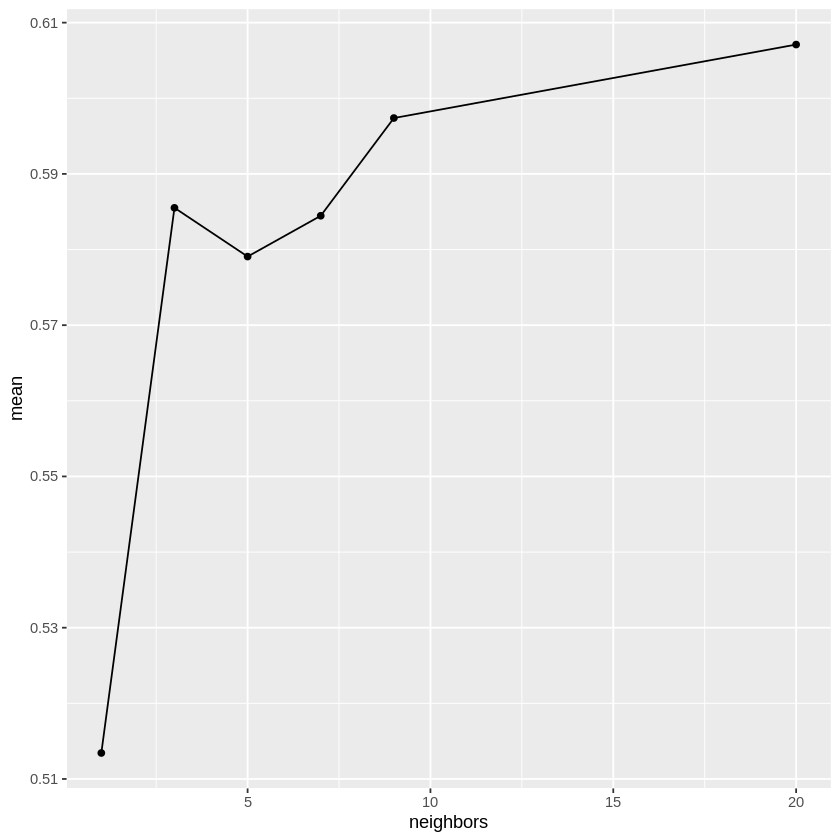

In [63]:
ggplot(accuracies, aes(x = neighbors, y = mean)) + geom_point() + geom_line()

In [64]:
# how do we make sure we can predict well?

In [65]:
marathon |> head()

age,bmi,female,footwear,group,injury,mf_d,mf_di,mf_ti,max,sprint,mf_s,time_hrs
<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
35,23.59232,0,2,1,2,42195,4,10295,60,1,4.098592,2.859722
33,22.51830,0,2,2,2,42195,3,12292,50,0,3.432720,3.414444
38,25.56031,0,2,3,1,42195,4,10980,65,0,3.842896,3.050000
34,22.60793,0,2,1,1,42195,3,10694,88,1,3.945670,2.970556
39,24.97484,0,2,1,1,42195,2,13452,51,0,3.136708,3.736667
33,24.30183,1,2,2,1,42195,3,14940,40,0,2.824297,4.150000


In [67]:
# split the data
set.seed(4242)

m_split <- initial_split(marathon, prop = 0.75, strata = female)
m_train <- training(m_split)
m_test <- testing(m_split)

In [71]:
m_recipe <- recipe(female ~ max, data = marathon) %>% # mistake of using full marathon
  step_scale(all_numeric_predictors()) |>
  step_center(all_numeric_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 20) |>
  set_engine("kknn") %>%
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(m_recipe) |>
  add_model(knn_spec) |>
  fit(data = marathon)

knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(20,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3659849
Best kernel: rectangular
Best k: 20

In [72]:
predictions_1 <- predict(knn_fit, marathon) %>%
  bind_cols(marathon)
head(predictions_1)

predictions_1 %>%
  metrics(truth = female, estimate = .pred_class)


.pred_class,age,bmi,female,footwear,group,injury,mf_d,mf_di,mf_ti,max,sprint,mf_s,time_hrs
<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
0,35,23.59232,0,2,1,2,42195,4,10295,60,1,4.098592,2.859722
0,33,22.51830,0,2,2,2,42195,3,12292,50,0,3.432720,3.414444
0,38,25.56031,0,2,3,1,42195,4,10980,65,0,3.842896,3.050000
0,34,22.60793,0,2,1,1,42195,3,10694,88,1,3.945670,2.970556
0,39,24.97484,0,2,1,1,42195,2,13452,51,0,3.136708,3.736667
0,33,24.30183,1,2,2,1,42195,3,14940,40,0,2.824297,4.150000


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.63293864
kap,binary,0.07568123


In [73]:
recipe_train <- recipe(female ~ max, data = m_train) %>% # use train
  step_scale(all_numeric_predictors()) %>%
  step_center(all_numeric_predictors())

recipe_train

knn_fit_train <- workflow() %>%
  add_recipe(recipe_train) %>%
  add_model(knn_spec) %>%
  fit(data = m_train)

knn_fit_train

predictions_2 <- predict(knn_fit_train, m_train) %>% # predict on train
  bind_cols(m_train)
head(predictions_2)

predictions_2 %>%
  metrics(truth = female, estimate = .pred_class)



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 1



── Operations 

• Scaling for: all_numeric_predictors()

• Centering for: all_numeric_predictors()



══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(20,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3635057
Best kernel: rectangular
Best k: 20

.pred_class,age,bmi,female,footwear,group,injury,mf_d,mf_di,mf_ti,max,sprint,mf_s,time_hrs
<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
0,35,23.59232,0,2,1,2,42195,4,10295,60,1,4.098592,2.859722
0,33,22.51830,0,2,2,2,42195,3,12292,50,0,3.432720,3.414444
0,38,25.56031,0,2,3,1,42195,4,10980,65,0,3.842896,3.050000
0,34,22.60793,0,2,1,1,42195,3,10694,88,1,3.945670,2.970556
0,39,24.97484,0,2,1,1,42195,2,13452,51,0,3.136708,3.736667
0,34,24.57002,0,1,3,1,42195,3,10747,75,1,3.926212,2.985278


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.64080460
kap,binary,0.03333333


In [75]:
# do it correctly

recipe_train <- recipe(female ~ max, data = marathon) |> # use train (good)
  step_scale(all_numeric_predictors()) |>
  step_center(all_numeric_predictors())

recipe_train

knn_fit_train <- workflow() |>
  add_recipe(recipe_train) |>
  add_model(knn_spec) |>
  fit(data = m_train) # fit on train (good)

knn_fit_train

predictions_3 <- predict(knn_fit_train, m_test) |> # predict on test (good)
  bind_cols(m_test)
head(predictions_3)

predictions_3 |>
  metrics(truth = female, estimate = .pred_class)



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 1



── Operations 

• Scaling for: all_numeric_predictors()

• Centering for: all_numeric_predictors()



══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(20,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3635057
Best kernel: rectangular
Best k: 20

.pred_class,age,bmi,female,footwear,group,injury,mf_d,mf_di,mf_ti,max,sprint,mf_s,time_hrs
<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
0,24,22.53944,1,2,2,1,42195,4,15420,30,0,2.736381,4.283333
0,52,23.80480,0,1,1,1,42195,4,13257,40,1,3.182847,3.682500
0,33,28.20037,1,2,2,1,42195,3,18484,15,0,2.282785,5.134444
0,27,20.77415,1,2,2,1,42195,2,12095,70,1,3.488632,3.359722
0,28,20.91324,1,1,1,1,42195,2,10888,86,1,3.875367,3.024444
0,31,24.52616,0,1,3,1,42195,2,10778,7,0,3.914919,2.993889


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.63090129
kap,binary,-0.01038725


In [76]:
predictions_1 %>%
  metrics(truth = female, estimate = .pred_class)

predictions_2 %>%
  metrics(truth = female, estimate = .pred_class)

predictions_3 %>%
  metrics(truth = female, estimate = .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.63293864
kap,binary,0.07568123


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.64080460
kap,binary,0.03333333


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.63090129
kap,binary,-0.01038725


In [84]:
# regression (knn and linear)

In [80]:
set.seed(424242)
m_split <- initial_split(marathon, prop = 0.75, strata = female)
m_train <- training(m_split)
m_test <- testing(m_split)

In [92]:
marathon_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
                 set_engine("kknn") |>
                 set_mode("regression")
marathon_spec

K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [87]:
marathon |> count(female)

female,n
<fct>,<int>
0,593
1,336


In [101]:
marathon |> pull(max) |> mean()

[1] 53.00129

In [102]:
m_train |> pull(max) |> mean()

[1] 52.75948

In [86]:
marathon_recipe <- recipe(time_hrs ~ max + female, data = m_train) |>
                   step_scale(all_numeric_predictors()) |>
                   step_center(all_numeric_predictors())

marathon_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Scaling for: all_numeric_predictors()

• Centering for: all_numeric_predictors()



In [108]:
gridvals <- tibble(neighbors = seq(from = 1, to = 41, by = 10))
gridvals

neighbors
<dbl>
1
11
21
31
41


In [109]:
marathon_vfold <- vfold_cv(m_train, v = 5, strata = time_hrs)

In [110]:
marathon_workflow <- workflow() |>
                     add_recipe(marathon_recipe) |>
                     add_model(marathon_spec) |>
                     tune_grid(resamples = marathon_vfold, grid = gridvals) |>
                     collect_metrics()
marathon_workflow

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,0.8189310,5,0.01243811,Preprocessor1_Model1
1,rsq,standard,0.1484223,5,0.01008181,Preprocessor1_Model1
11,rmse,standard,0.5573217,5,0.01871256,Preprocessor1_Model2
11,rsq,standard,0.3894622,5,0.01862499,Preprocessor1_Model2
21,rmse,standard,0.5505424,5,0.01586727,Preprocessor1_Model3
21,rsq,standard,0.4023609,5,0.01493617,Preprocessor1_Model3
31,rmse,standard,0.5464866,5,0.01708139,Preprocessor1_Model4
31,rsq,standard,0.4084444,5,0.01368831,Preprocessor1_Model4
41,rmse,standard,0.5459294,5,0.01805168,Preprocessor1_Model5


In [111]:
marathon_acc <- marathon_workflow |>
    filter(.metric == 'rmse')
marathon_acc

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,0.8189310,5,0.01243811,Preprocessor1_Model1
11,rmse,standard,0.5573217,5,0.01871256,Preprocessor1_Model2
21,rmse,standard,0.5505424,5,0.01586727,Preprocessor1_Model3
31,rmse,standard,0.5464866,5,0.01708139,Preprocessor1_Model4
41,rmse,standard,0.5459294,5,0.01805168,Preprocessor1_Model5


In [112]:
marathon_acc |>
 filter(mean == min(mean))

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
41,rmse,standard,0.5459294,5,0.01805168,Preprocessor1_Model5


In [114]:
marathon_acc |>
    slice_min(mean, n=1) 

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
41,rmse,standard,0.5459294,5,0.01805168,Preprocessor1_Model5


In [116]:
k_best <- marathon_acc |>
  filter(mean == min(mean)) |>
  pull(neighbors)
k_best

[1] 41

In [118]:
marathon_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_best) |>
                            set_engine("kknn") |>
                            set_mode("regression")

marathon_best_fit <- workflow() |>
                        add_recipe(marathon_recipe) |>
                        add_model(marathon_best_spec) |>
                        fit(data = m_train)

marathon_summary <- marathon_best_fit |> 
                       predict(m_test) |>
                       bind_cols(m_test) |>
                       metrics(truth = time_hrs, estimate = .pred) 
marathon_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.5998920
rsq,standard,0.4184801
mae,standard,0.4332147


In [119]:
# mess up train/test
marathon_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_best) |>
                            set_engine("kknn") |>
                            set_mode("regression")

marathon_best_fit <- workflow() |>
                        add_recipe(marathon_recipe) |>
                        add_model(marathon_best_spec) |>
                        fit(data = m_train)

marathon_summary <- marathon_best_fit |> 
                       predict(m_train) |>
                       bind_cols(m_train) |>
                       metrics(truth = time_hrs, estimate = .pred) 
marathon_summary
# rmse lower, (so a bit better. but artificial)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.5331159
rsq,standard,0.4355620
mae,standard,0.4054456


In [130]:
lm_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression")

# marathon_recipe
marathon_recipe <- recipe(time_hrs ~ max + female, data = m_train)

marathon_recipe

lm_mod <- workflow() |>
    add_recipe(marathon_recipe) |>
    add_model(lm_spec) |>
    fit(data = m_train)
lm_mod



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)          max      female1  
    4.65596     -0.02026      0.37418  


In [129]:
lm_mod |> 
    predict(m_test) |>
    bind_cols(m_test) |>
    metrics(truth = time_hrs, estimate = .pred) 

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.6097583
rsq,standard,0.3980943
mae,standard,0.4446058


In [120]:
# clustering

In [133]:
mtcars_subset <- mtcars %>%
  select(mpg, disp, hp, wt)
mtcars_subset |> head()

,mpg,disp,hp,wt
,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,160,110,2.620
Mazda RX4 Wag,21.0,160,110,2.875
Datsun 710,22.8,108,93,2.320
Hornet 4 Drive,21.4,258,110,3.215
Hornet Sportabout,18.7,360,175,3.440
Valiant,18.1,225,105,3.460


In [142]:
library(tidyclust)
r_clust <- recipe(~ ., data = mtcars_subset) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

s_clust <- k_means(num_clusters = 4) |> # kmeans come from tidyclust
    set_engine("stats")

c_cars <- workflow() |>
    add_recipe(r_clust) |>
    add_model(s_clust) |>
    fit(data = mtcars_subset)

c_cars

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: k_means()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-means clustering with 4 clusters of sizes 12, 7, 7, 6

Cluster means:
         mpg       disp         hp         wt
4  0.1384407 -0.5707543 -0.5448163 -0.2454544
3 -0.5483556  0.6850701  0.3400164  0.4816984
1 -1.1077479  1.2897470  1.4839092  1.1166629
2  1.6552394 -1.1624447 -1.0382807 -1.3738462

Clustering vector:
 [1] 1 1 1 1 2 1 3 1 1 1 1 2 2 2 3 3 3 4 4 4 1 2 2 3 2 4 4 4 3 1 3 1

Within cluster sum of squares by cluster:
[1]  5.890043  1.961321 10.922714  2.262541
 (between_SS / total_SS =  83.0 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifau

In [140]:
mtcars_subset |> head()

,mpg,disp,hp,wt
,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,160,110,2.620
Mazda RX4 Wag,21.0,160,110,2.875
Datsun 710,22.8,108,93,2.320
Hornet 4 Drive,21.4,258,110,3.215
Hornet Sportabout,18.7,360,175,3.440
Valiant,18.1,225,105,3.460


In [144]:
clustered_cars <- augment(c_cars, mtcars_subset) # really similar to bind_cols we did before
clustered_cars |> head()

mpg,disp,hp,wt,.pred_cluster
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
21.0,160,110,2.620,Cluster_1
21.0,160,110,2.875,Cluster_1
22.8,108,93,2.320,Cluster_1
21.4,258,110,3.215,Cluster_1
18.7,360,175,3.440,Cluster_2
18.1,225,105,3.460,Cluster_1


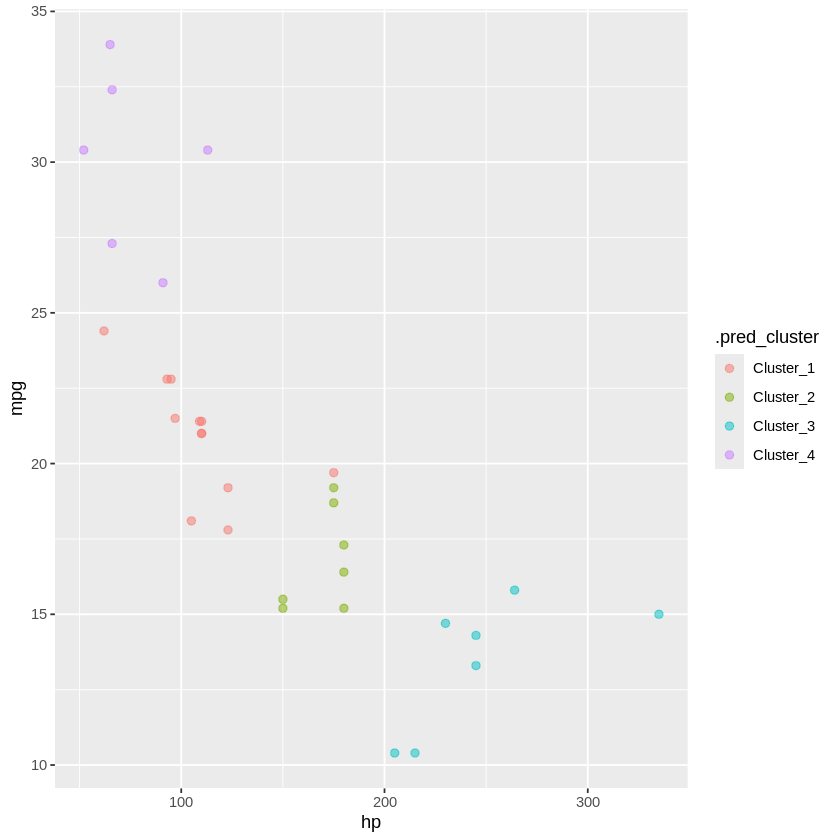

In [145]:
ggplot(clustered_cars, aes(x = hp, y = mpg, colour = .pred_cluster)) +
  geom_point(alpha = 0.5, size = 2)

In [146]:
ks <- tibble(num_clusters = 1:10)

new_spec <- k_means(num_clusters = tune()) |> set_engine("stats", nstart=10)

elbow_stats <- workflow() |>
    add_recipe(r_clust) |>
    add_model(new_spec) |>
    tune_cluster(resamples = apparent(mtcars_subset), grid = ks) |> # really similar to fit resamples when doing cv
    collect_metrics() |>`
    filter(.metric == "sse_within_total") |>
    mutate(total_WSSD = mean) |>
    select(num_clusters, total_WSSD)

In [147]:
?apparent

apparent {rsample},R Documentation
data,A data frame.
...,These dots are for future extensions and must be empty.


In [148]:
elbow_stats

num_clusters,total_WSSD
<int>,<dbl>
1,124.000000
2,46.072608
3,29.402405
4,18.369057
5,12.209820
6,9.581504
7,8.444016
8,7.184407
9,6.273651


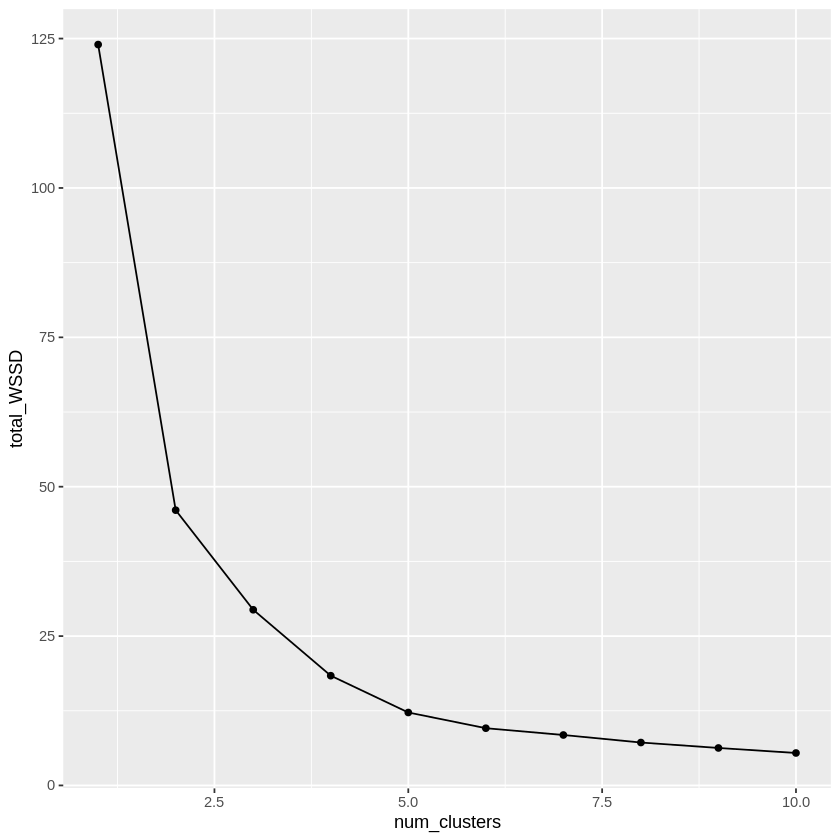

In [149]:
ggplot(elbow_stats, aes(x = num_clusters, y = total_WSSD)) +
  geom_point() +
  geom_line()

In [150]:
# inference

In [151]:
library(tidyverse)
library(tidymodels)

# inference example -----

mtcars

mtcars_sample <- mtcars |> sample_n(size = 16)

mtcars_sample


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.50,0,1,5,6
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3
Pontiac Firebird,19.2,8,400.0,175,3.08,3.845,17.05,0,0,3,2
Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4
Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2
Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3
Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1


In [152]:
nrow(mtcars_sample)

[1] 16

In [153]:

bootstrap_samples <- rep_sample_n(mtcars_sample, size = 16, reps = 1000, replace = TRUE)

bootstrap_sample_estimates <- bootstrap_samples %>%
  group_by(replicate) %>% # technically the data is already grouped, but i'm putting this here to be extra explicit
  summarize(avg_mpg = mean(mpg, na.rm = TRUE))
bootstrap_sample_estimates


replicate,avg_mpg
<int>,<dbl>
1,17.79375
2,18.99375
3,17.83750
4,19.40625
5,18.55625
6,18.55625
7,17.18750
8,18.95000
9,16.02500


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


[1] 18.23763

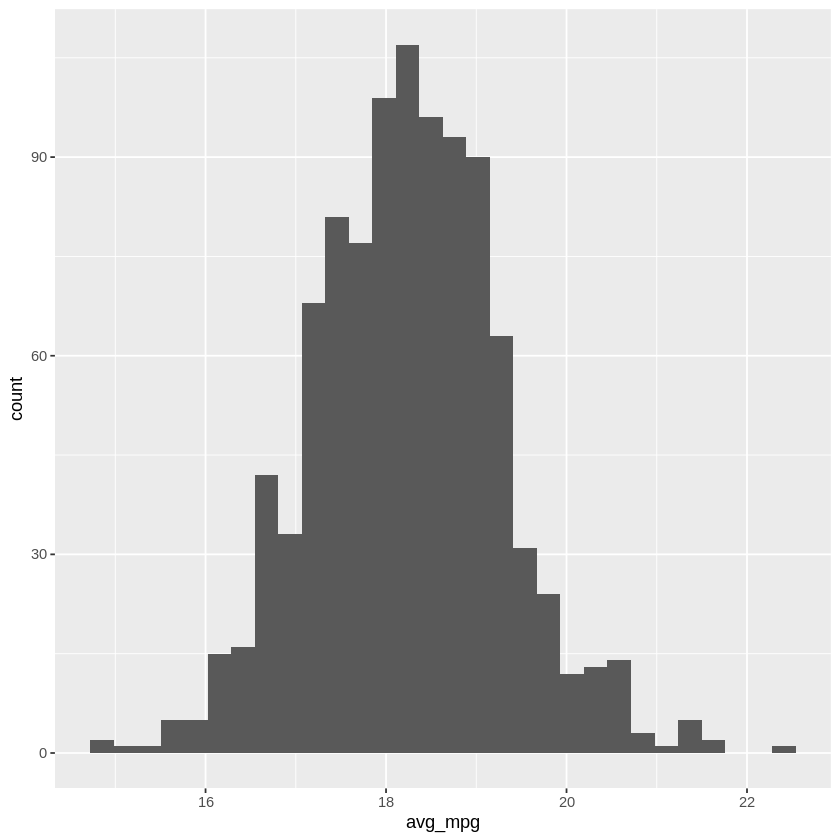

In [154]:
ggplot(bootstrap_sample_estimates, aes(x = avg_mpg)) + geom_histogram()

bootstrap_sample_estimates %>%
    pull(avg_mpg) %>%
    mean()

In [155]:
mtcars |>
    pull(mpg) |>
    mean()

[1] 20.09062

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


[1] 19.83849

[1] 1.019509

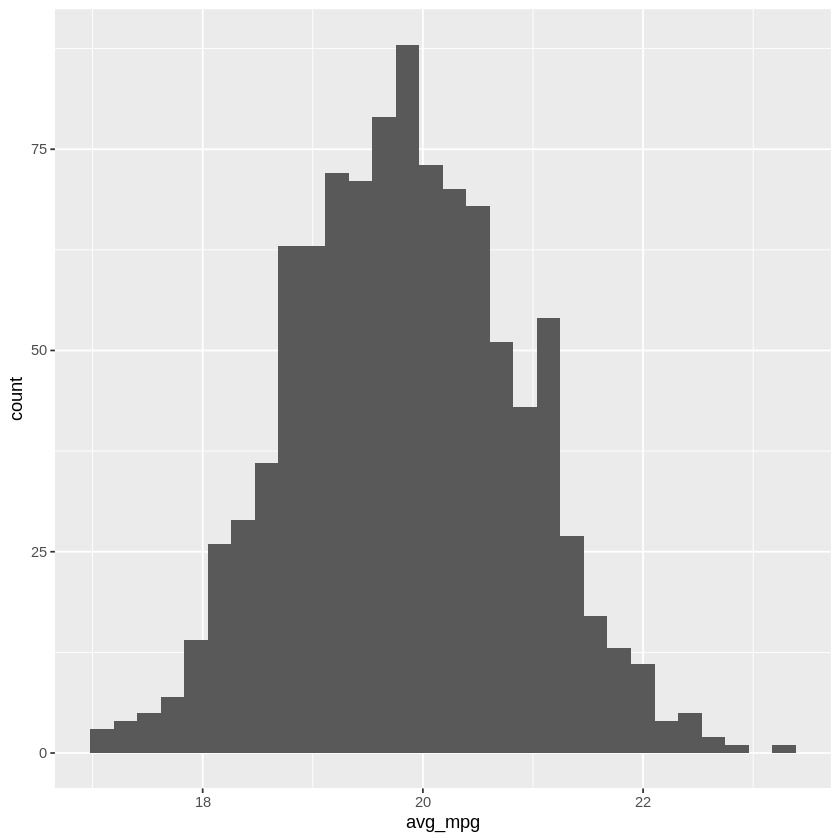

In [160]:
s_size <- 30

mtcars_sample <- mtcars |> sample_n(size = s_size)
bootstrap_samples <- rep_sample_n(mtcars_sample, size = s_size, reps = 1000, replace = TRUE)

bootstrap_sample_estimates <- bootstrap_samples %>%
  group_by(replicate) %>% # technically the data is already grouped, but i'm putting this here to be extra explicit
  summarize(avg_mpg = mean(mpg, na.rm = TRUE))

ggplot(bootstrap_sample_estimates, aes(x = avg_mpg)) + geom_histogram()

bootstrap_sample_estimates %>%
    pull(avg_mpg) %>%
    mean()

bootstrap_sample_estimates %>%
    pull(avg_mpg) %>%
    sd()